# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



21 should be categorical as it contains the strings 'yes' or 'no'. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Objective: Find the classifier between K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines that performs the best in determining which client subscribed a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
df_bank = df.drop(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 
                   'cons.conf.idx', 'euribor3m', 'nr.employed'], axis = 1) #using only bank information features

num_col = ['age', 'duration']
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_col)
        
    ])


In [21]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_bank.drop(['y'], axis=1)
y = df_bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

pipeline_dummy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(random_state=42))
])

pipeline_dummy.fit(X_train, y_train)

dummy_acc = accuracy_score(y_test, pipeline_dummy.predict(X_test))

print(f"Baseline Accuracy: {dummy_acc}")

Baseline Accuracy: 0.8875940762320952


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week'])])),
                ('classifier', LogisticRegression(random_state=42))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [62]:
log_acc = accuracy_score(y_test, pipeline_log.predict(X_test))
print(f"Baseline Accuracy: {log_acc}")

Baseline Accuracy: 0.9007040543821316


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [14]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = []

for model_name, model in models.items():

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
    
   
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    
results_df = pd.DataFrame(results)

In [42]:
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.240650,0.898789,0.900704
1,KNN,0.077819,0.919600,0.892531
2,Decision Tree,0.638110,0.999965,0.866311
3,SVM,12.349909,0.913808,0.901109


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [67]:
pipeline_log.named_steps['classifier'].coef_

array([[ 0.08497843,  1.07739216, -0.38518243, -0.36382658, -0.08175589,
        -0.20443931,  0.49617475, -0.40447021, -0.22401247,  0.81867822,
        -0.15262994,  0.25859966, -0.0515521 ,  0.08262773,  0.2299303 ,
        -0.08724402,  0.0735952 , -0.12978879, -0.04453665,  0.73878482,
         0.05433329,  0.23230709,  0.16686994, -0.71192551, -0.07032078,
        -0.02896491, -0.0494271 , -0.02896491,  0.00251432, -1.41172745,
        -0.80312081,  0.96532079, -1.05088986,  0.29595438,  1.62115012,
        -0.82948262, -0.85159981,  1.33021305,  1.09039044, -0.04806055,
         0.10023705,  0.16523004,  0.14881139]])

In [78]:
from sklearn.preprocessing import PolynomialFeatures

#log
pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('classifier', LogisticRegression(random_state=42, max_iter=10000))
])

param_grid = {
    'polynomial__degree': [1, 2, 3], #testing different polynomial degree to see if there are non-linear relationships not 
                                     #being captured
}

grid_search = GridSearchCV(pipeline_log, param_grid, cv=3, n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [79]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'polynomial__degree': 1}
Best score: 0.8983733122019215


In [80]:
#KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9], #testing what # of neighbors provides better results
}

grid_search = GridSearchCV(pipeline_knn, param_grid, cv=3, n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=1, param_grid={'classifier__n_neighbors': [3, 5, 7, 9]})

In [81]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.8938296760999048


In [84]:
#dec
pipeline_dec = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__max_depth': [3, 5, 7, 10], #testing what # of neighbors provides better results
}

grid_search = GridSearchCV(pipeline_dec, param_grid, cv=3, n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=1, param_grid={'classifier__max_depth': [3, 5, 7, 10]})

In [85]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'classifier__max_depth': 7}
Best score: 0.8975061527119843


In [87]:
#SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

param_grid = {
    'classifier__kernel': ['linear', 'rbf'] #Check if our data is composed of more linearly separable data
}

grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5, n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('classifier', SVC())]),
             n_jobs=1, param_grid={'classifier__kernel': ['linear', 'rbf']})

In [88]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'classifier__kernel': 'rbf'}
Best score: 0.8995874117457918


In [25]:
from sklearn.metrics import f1_score

new_results_df = pd.DataFrame({'Model':[], 'Train Time':[], 'Train Accuracy':[], 'Test Accuracy':[], 'Train F1':[], 'Test F1':[]})

pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=7))
])

pipeline_dec = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=7))
])

pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

In [28]:
models = {
    'Logistic Regression': pipeline_log,
    'KNN': pipeline_knn,
    'Decision Tree': pipeline_dec,
    'SVM': pipeline_svm
}

results_list = []

for model_name, pipeline in models.items():
    
    start_time = time.time()

    pipeline.fit(X_train, y_train)

    train_time = time.time() - start_time #train time

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred) #get accuracy

    train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
    test_f1 = f1_score(y_test, y_test_pred, pos_label=1) #get f1 score

    model_results = pd.DataFrame({
        'Model': [model_name],
        'Train Time': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Train F1': [train_f1],
        'Test F1': [test_f1]
    })

    results_list.append(model_results)

new_results_df = pd.concat(results_list, ignore_index=True)

new_results_df

,Model,Train Time,Train Accuracy,Test Accuracy,Train F1,Test F1
0,Logistic Regression,0.176350,0.898789,0.900704,0.380467,0.392273
1,KNN,0.060000,0.913114,0.895929,0.491164,0.365878
2,Decision Tree,0.120996,0.908120,0.902565,0.459057,0.410959
3,SVM,62.060117,0.913808,0.901109,0.476952,0.384073


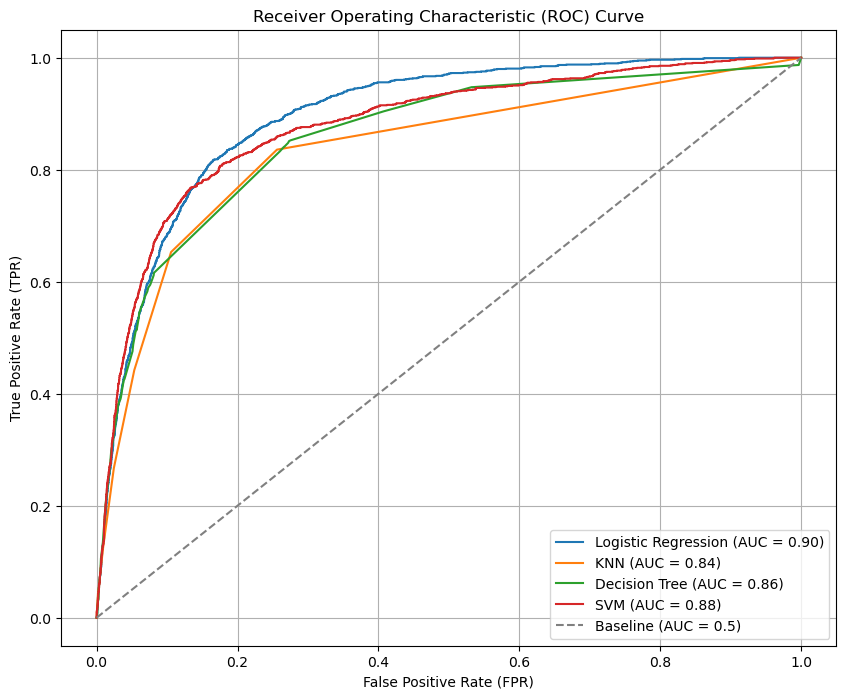

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_bank['y'])

X = df_bank.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10, 8))

for model_name, pipeline in models.items():

    pipeline.fit(X_train, y_train)

    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Baseline (AUC = 0.5)')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

### Evaluation:

Of the 4 models that are being considered, all 4 have higher accuracy over the baseline (dummy) model. All 4 models seem to perform reasonably well, but Logistic Regression seems to perform the best. Other than Logistic Regression, all of the other 3 models show some sign of overfitting (not able to perform well with unseen data). 

Our business objective was to find out which classifier would have the highest probablity of determining if a client would subscribe a term deposit. From our findings, Logistic Regression should be deployed.

After gathering data on the effectiveness of Logistic Regression, we can analyze whether our model needs to be adjusted or if another classifier would be a better fit. 

##### Questions